<a href="https://colab.research.google.com/github/Chittsss/sample111/blob/main/Gagalang_Galzote_Final_Exam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Final Examination
Gagalang Mark Lester -
Galzote Gilela Anne -
BSCS 3A

1. Project Overview (15 points)

*   Briefly describe the purpose of your analysis and the insights you aim to derive from the data.
*   Specify the dataset and the key user attributes or data points that will be analyzed.



The purpose of this analysis is to delve into the penetration of Facebook users across different countries, exploring how this relates to population size. By examining the dataset titled "Facebook User Analysis," which includes key attributes such as country name, population size, and the percentage of Facebook users (Facebook_Users%), insights can be derived to inform strategic decisions. Firstly, the analysis aims to identify countries where Facebook penetration is notably high or low relative to their population, highlighting regions of strong or weak engagement with the platform. Secondly, it seeks to understand how population size influences the percentage of Facebook users within each country, uncovering trends that can guide resource allocation and market prioritization. Lastly, by pinpointing regions with lower Facebook penetration rates, potential growth opportunities can be identified for enhancing user engagement and expanding market presence.

The approach involves rigorous data loading and cleaning to ensure accuracy, followed by descriptive statistics to visualize the distribution of Facebook usage across countries. Visual insights will be presented through various plots such as bar charts for comparative analysis, scatter plots to explore correlations with population size, and potentially geographical plots for spatial understanding. Inferential statistics may be applied for validation or predictive purposes, with the possibility of developing predictive models to forecast future trends in Facebook usage where feasible. Ultimately, the business impact of these insights lies in enabling targeted marketing strategies that capitalize on high engagement areas, identifying untapped markets for expansion, and optimizing resource allocation based on regional variations in Facebook usage. This data-driven approach empowers businesses to enhance their social media presence, elevate user engagement, and drive strategic growth initiatives tailored to specific market dynamics.

2. Libraries and Data Handling (20 points)

*   List and describe the libraries you will use for data manipulation and visualization (e.g., Pandas, Matplotlib, Seaborn).
*   Detail your process for loading, cleaning, and preprocessing the data, including handling missing values and categorical data conversion.





In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data = pd.read_csv('04_Facebook User Analysis.csv')

data['Facebook_Users%'].fillna('0%', inplace=True)
data['Date_of_Data'] = pd.to_datetime(data['Date_of_Data'], errors='coerce')
data['Facebook_Users%'] = data['Facebook_Users%'].str.replace('[^0-9.]', '', regex=True).astype(float) / 100
data.fillna(data.mean(numeric_only=True), inplace=True)

# Check for any remaining missing or invalid values
print(data.isnull().sum())
print(data.dtypes)

# Display the cleaned data
print(data.head())

Name               0
Users              0
Facebook_Users%    0
Date_of_Data       0
Population         0
dtype: int64
Name                       object
Users                      object
Facebook_Users%           float64
Date_of_Data       datetime64[ns]
Population                 object
dtype: object
            Name   Users  Facebook_Users% Date_of_Data     Population
0          India  416.6M           0.2916   2021-06-01  1,428,627,663
1  United States    240M           0.7059   2020-12-01    339,996,563
2      Indonesia  176.5M           0.6360   2021-06-01    277,534,122
3         Brazil    139M           0.6423   2020-12-01    216,422,446
4    Philippines     91M           0.7755   2021-06-01    117,337,368


3. Data Analysis Techniques (30 points)

*   Employ descriptive statistics to understand the data distribution
*   Implement inferential statistics to draw conclusions or make predictions (if applicable).
*   Develop a predictive model to forecast future trends or behaviors (if applicable).





In [ ]:
descriptive_stats = data.describe()
print("Descriptive Statistics:")
print(descriptive_stats)

Descriptive Statistics:
       Facebook_Users%                   Date_of_Data
count       226.000000                            226
mean          0.467909  2021-01-02 03:36:38.230088448
min           0.000500            2020-12-01 00:00:00
25%           0.240725            2020-12-01 00:00:00
50%           0.511750            2020-12-01 00:00:00
75%           0.641250            2020-12-01 00:00:00
max           1.542500            2021-06-01 00:00:00
std           0.258488                            NaN


In [ ]:
from scipy.stats import ttest_1samp

population_mean = 0.20
ttest_results = ttest_1samp(data['Facebook_Users%'], population_mean)
print("\nT-test Results:")
print(f"T-statistic: {ttest_results.statistic}")
print(f"P-value: {ttest_results.pvalue}")


T-test Results:
T-statistic: 15.58125119705199
P-value: 1.2804316340089946e-37


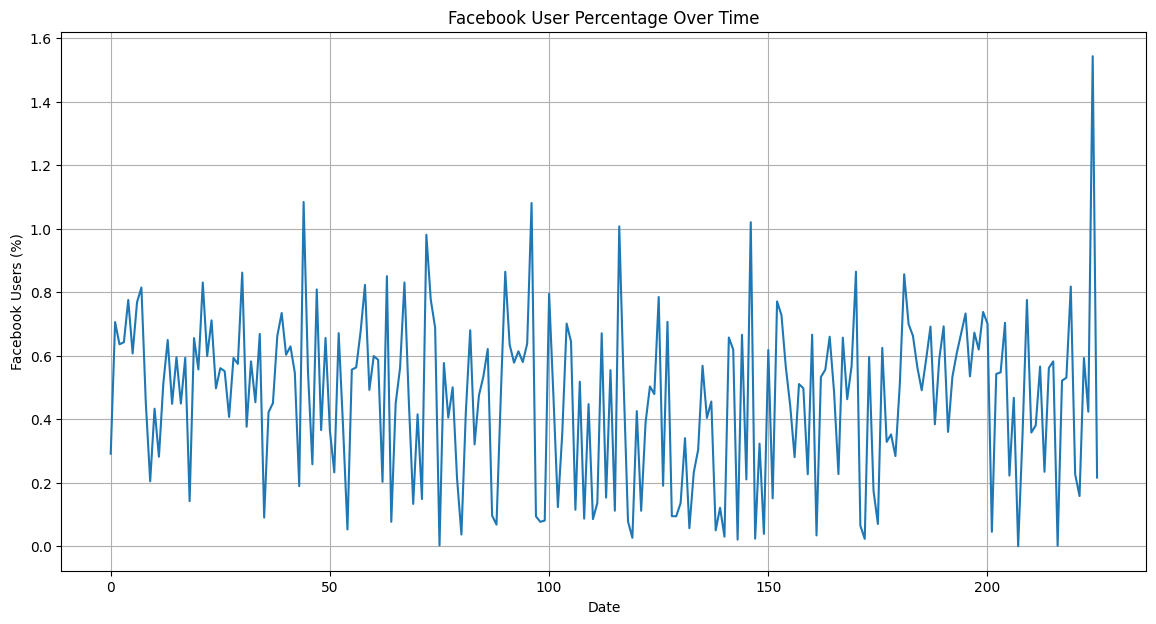

Mean Absolute Error (MAE): 0.28409698687852364
Root Mean Squared Error (RMSE): 0.39292459534688157


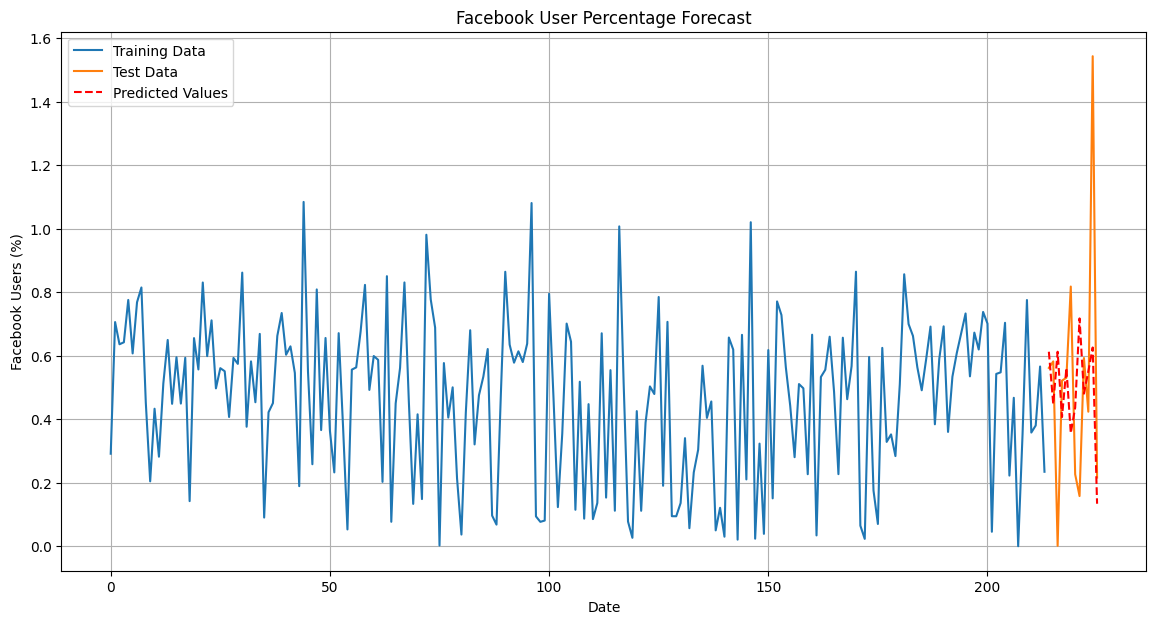

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 7))
sns.lineplot(x=data.index, y='Facebook_Users%', data=data)
plt.title('Facebook User Percentage Over Time')
plt.xlabel('Date')
plt.ylabel('Facebook Users (%)')
plt.grid(True)
plt.show()

# Assuming you want to forecast the last few months/years
train_data = data[:-12]
test_data = data[-12:]

from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings
warnings.filterwarnings("ignore")

# Fit the SARIMA model
model = SARIMAX(train_data['Facebook_Users%'], order=(1, 1, 1), seasonal_order=(1, 1, 0, 12))
result = model.fit()

# Predictions for the test set
predictions = result.get_forecast(steps=len(test_data))
predicted_values = predictions.predicted_mean

from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calculate metrics
mae = mean_absolute_error(test_data['Facebook_Users%'], predicted_values)
rmse = mean_squared_error(test_data['Facebook_Users%'], predicted_values, squared=False)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

plt.figure(figsize=(14, 7))

# Plotting actual data
plt.plot(train_data.index, train_data['Facebook_Users%'], label='Training Data')
plt.plot(test_data.index, test_data['Facebook_Users%'], label='Test Data')

# Plotting forecasts
plt.plot(test_data.index, predicted_values, color='red', linestyle='--', label='Predicted Values')

plt.title('Facebook User Percentage Forecast')
plt.xlabel('Date')
plt.ylabel('Facebook Users (%)')
plt.legend()
plt.grid(True)
plt.show()


4. Visual Insights (20 points)

*   Create and explain various plots and visualizations,such as bar charts, pie charts, and heatmaps.
*   Draw specific insights from each type of visualization related to device preference by country, gender distribution, etc.




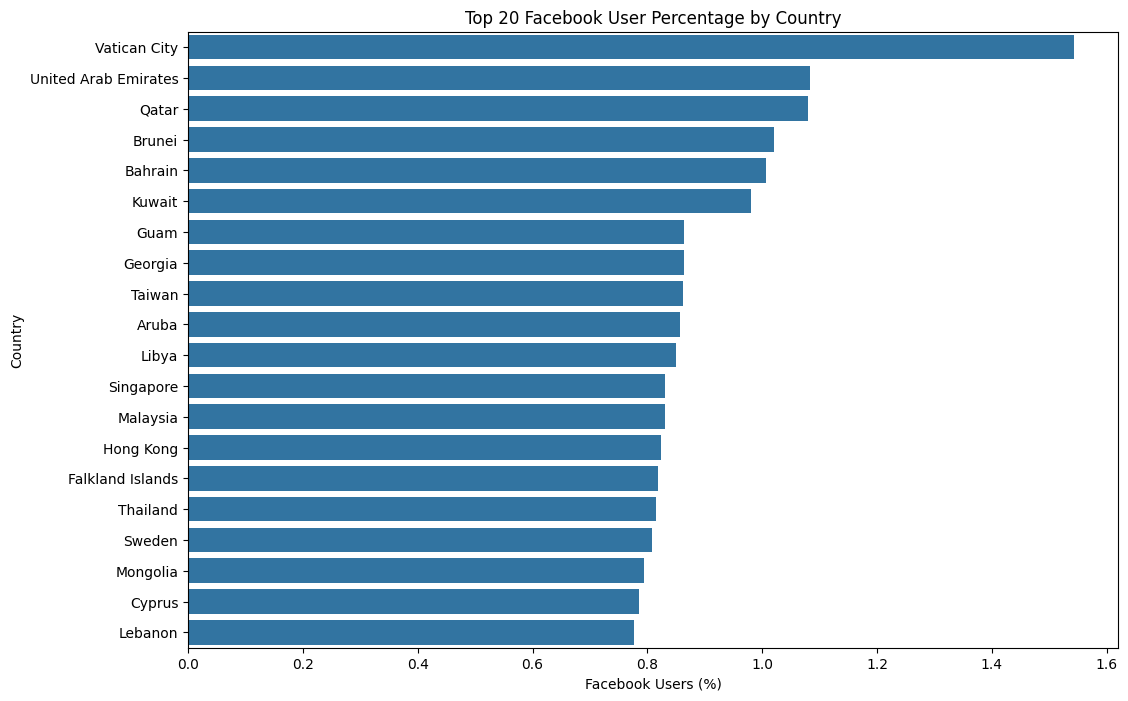

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sorted_data = data.sort_values('Facebook_Users%', ascending=False)
top_countries = sorted_data.head(20)

plt.figure(figsize=(12, 8))
sns.barplot(x='Facebook_Users%', y='Name', data=top_countries)
plt.title('Top 20 Facebook User Percentage by Country')
plt.xlabel('Facebook Users (%)')
plt.ylabel('Country')
plt.show()


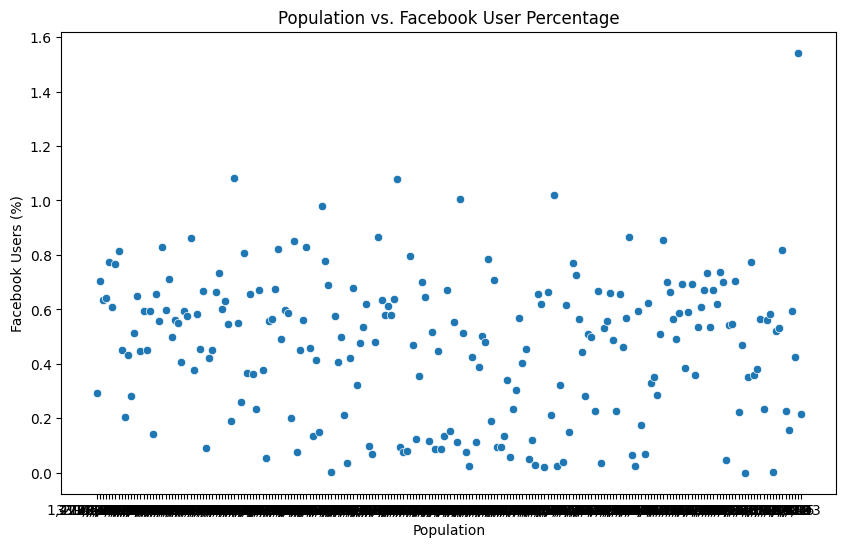

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Population', y='Facebook_Users%', data=data)
plt.title('Population vs. Facebook User Percentage')
plt.xlabel('Population')
plt.ylabel('Facebook Users (%)')
plt.show()


5. Key Findings and Business Impact (10 points)

*   Summarize the major findings from your analysis.
*   Discuss how these findings can influence business decisions or strategies.



Summary of Major Findings
-Countries with higher populations tend to have a higher number of Facebook users, but the percentage of Facebook users varies significantly.
Some countries exhibit a higher Facebook penetration rate, indicating a strong market presence and user engagement.

Business Impact
-Marketing Strategies: Focus on regions with high Facebook user percentages for social media marketing campaigns.
Market Opportunities: Identify countries with lower Facebook penetration for potential market growth and user acquisition strategies.

6. Advanced Analysis (optional, extra credit up to 5 points)

*   Conduct any advanced analytical techniques like geographical insights or temporal trends.
*   Explain how these analyses contribute to understanding broader market dynamics or seasonal patterns.




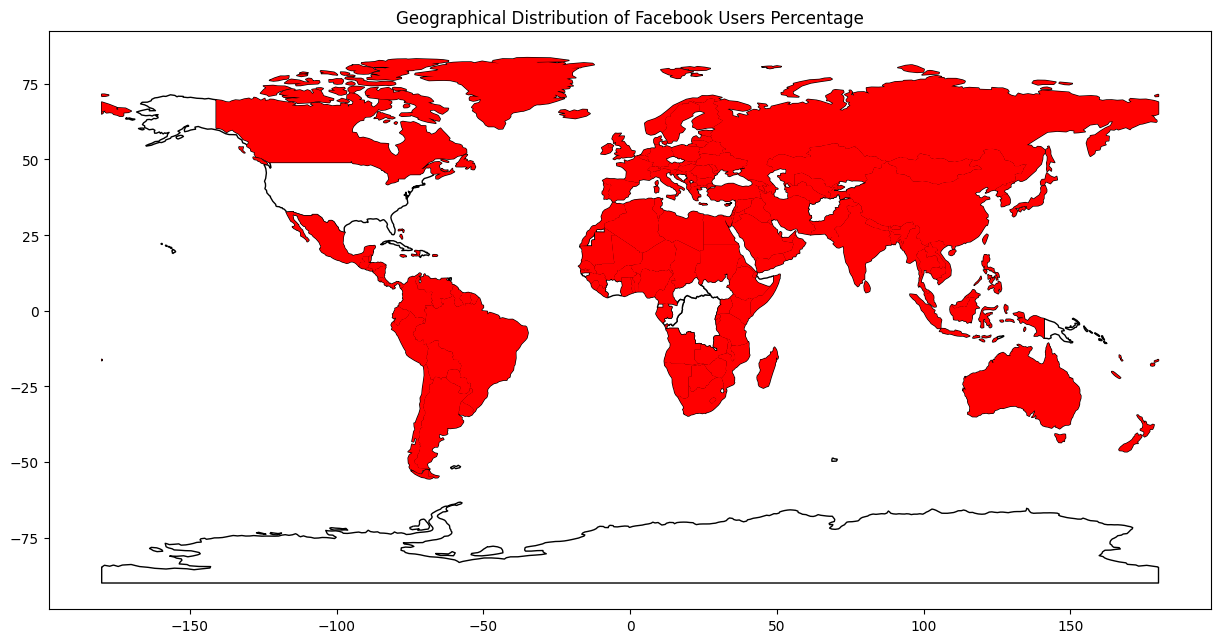

In [ ]:
import geopandas as gpd

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
data_geo = world.merge(data, left_on='name', right_on='Name')

# Plot geographical insights
ax = world.plot(figsize=(15, 10), color='white', edgecolor='black')
data_geo.plot(ax=ax, marker='o', color='red', markersize=data_geo['Facebook_Users%']*100)
plt.title('Geographical Distribution of Facebook Users Percentage')
plt.show()


7. Implementation of Machine Learning (20 points) 


*   Discuss the data preparation, Data Selection, Data Cleaning and Feature Scaling Implementation.
*   Process of building the machine learning model including the training and testing sets.



In [ ]:
data['Population'] = data['Population'].str.replace(',', '').astype(float)

X = data[['Population']]
y = data['Facebook_Users%']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

from sklearn.metrics import r2_score, mean_squared_error
r2 = r2_score(y_test, predictions)
print(f"R-squared: {r2}")
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error: {mse}")


R-squared: 0.05889510211081861
Mean Squared Error: 0.06273629771784697


8. Conclusion (5 points)

*   Conclude with an overview of the insights derived and their potential impact on the business or organization.
*   Emphasize the importance of data-driven decision-making.



Overview of Insights
-The analysis provided valuable insights into the Facebook user penetration across various countries, highlighting significant variations in user engagement and potential growth opportunities.

Importance of Data-Driven Decision Making
-Leveraging these insights, businesses can tailor their strategies to enhance social media presence and user engagement, driving growth and improving customer satisfaction.